In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv(r'C:\Users\j\Desktop\Dataset\quikr_car.csv')
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


## Problems
- year has many non-year value.
- Need to convert year from object to int.
- Price has 'Ask For Price' value.
- Need to convert Price from object to int.
- kms_driven has kms values with int.
- kms_driven has nan & Petrol value.
- fuel_type has nan values.
- Need to keep first 3 words of name.

In [19]:
Backup_df = df.copy()

## Cleaning

### year

In [20]:
df = df[df['year'].str.isnumeric()]
df['year'] = df['year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int32 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int32(1), object(5)
memory usage: 42.8+ KB


### Price

In [21]:
df = df[df['Price'] != 'Ask For Price']
df['Price'] = df['Price'].str.replace(',','').astype(int)

### kms_diven

In [22]:
df['kms_driven'] = df['kms_driven'].str.split(' ').str.get(0).str.replace(',','')
df = df[df['kms_driven'].str.isnumeric()]
df['kms_driven'] = df['kms_driven'].astype(int)

### fuel_type

In [23]:
df = df[~df['fuel_type'].isna()]

### name

In [24]:
df['name'] = df['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [26]:
df.reset_index(drop=True)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [27]:
df.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


## Checking for outliers

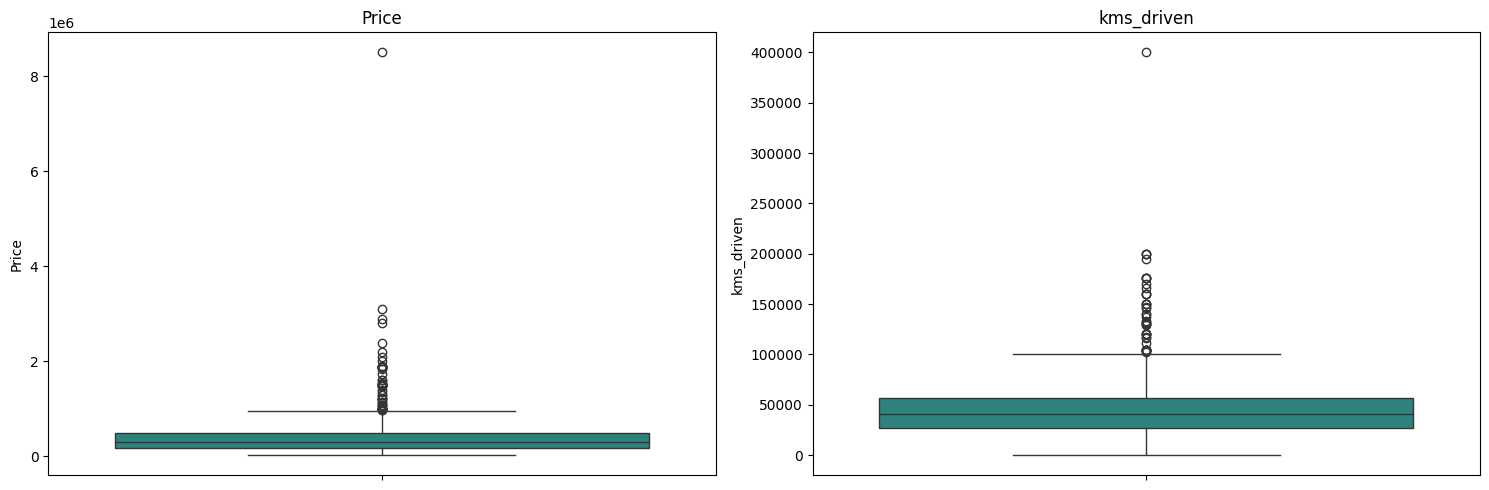

In [28]:
def plot_boxplot(df):
    numeric_cols = ['Price','kms_driven']
    
    plt.figure(figsize=(15,5))
    for i,col in enumerate(numeric_cols,1):
        plt.subplot(1,len(numeric_cols),i)
        sns.boxplot(y=df[col],palette= 'viridis')
        plt.title(col)
    plt.tight_layout()
    plt.show()
plot_boxplot(df)

## Handling outliers

In [29]:
def outlier_handleing(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    IQR = Q3 - Q1
    min_range = Q1 - 1.5*IQR
    max_range = Q3 + 1.5*IQR
    
    outlier_data = df[(df[column]< min_range) | (df[column]> max_range)]
    print(f'Number of outliers in column {column} is {len(outlier_data)}')
    
    df[column] = np.where(df[column]< min_range,min_range,np.where(df[column]> max_range,max_range,df[column]))
    return df
for i in ['Price','kms_driven']:
    outlier_handleing(i)
print('.'* 50)
print("Outliers handled using IQR method and filled up with max_range and min_range")

Number of outliers in column Price is 53
Number of outliers in column kms_driven is 43
..................................................
Outliers handled using IQR method and filled up with max_range and min_range


## Checking if outliers gone

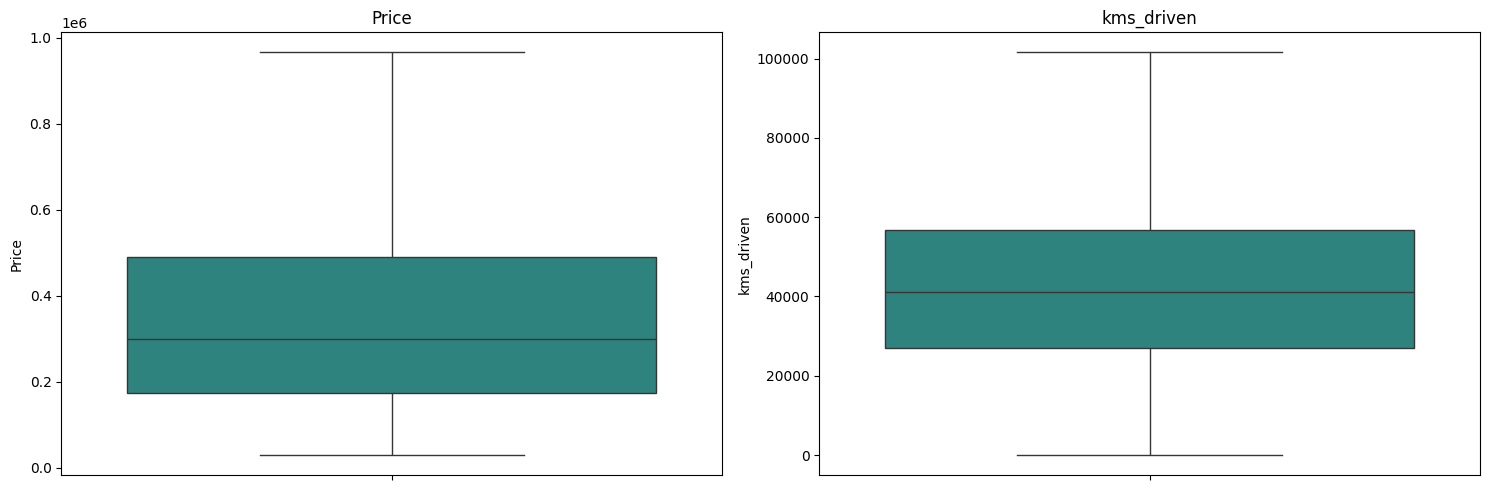

In [30]:
def plot_boxplot(df):
    numeric_cols = ['Price','kms_driven']
    
    plt.figure(figsize=(15,5))
    for i,col in enumerate(numeric_cols,1):
        plt.subplot(1,len(numeric_cols),i)
        sns.boxplot(y=df[col],palette= 'viridis')
        plt.title(col)
    plt.tight_layout()
    plt.show()
plot_boxplot(df)